### 1. Import Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# create Pandas Data Frame
df = pd.read_csv("../../C_Datasets/titanic_data_train.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
# check the columns
df.info()
# there is no null data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


### 2. Standardization

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [5]:
# shrink the Data Frame to be understandable
df_regression = df[["ENGINESIZE", "FUELCONSUMPTION_HWY", "FUELCONSUMPTION_COMB", "CO2EMISSIONS"]]
df_regression.sample(7)

,ENGINESIZE,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
632,2.4,9.1,10.7,246
736,4.7,9.4,11.5,264
393,1.6,6.4,7.6,175
72,4.0,10.6,14.0,322
799,1.6,6.7,8.0,184
151,2.0,8.7,10.7,246
823,2.0,7.1,8.6,198


In [6]:
df_regression.loc[:, "ENGINESIZE"] = scaler.fit_transform(df_regression.iloc[:, :-1])[:, 0]
df_regression.loc[:, "FUELCONSUMPTION_HWY"] = scaler.fit_transform(df_regression.iloc[:, :-1])[:, 1]
df_regression.loc[:, "FUELCONSUMPTION_COMB"] = scaler.fit_transform(df_regression.iloc[:, :-1])[:, 2]

In [7]:
df_regression.sample(7)

,ENGINESIZE,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
538,1.592462,0.259701,0.349923,294
39,-0.244694,-0.098311,-0.109324,258
54,0.461905,-0.062510,0.292517,290
264,1.380482,1.834955,1.957289,294
795,-1.233931,-0.993341,-1.027819,184
112,1.875101,0.725117,1.124903,356
686,1.451142,1.369539,1.268418,368


### 3. Split Data Frame to Train & Test Set

In [8]:
from sklearn.model_selection import train_test_split

X = df_regression.drop(columns=["CO2EMISSIONS"]).values
y = df_regression["CO2EMISSIONS"].values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### 4. Create Model

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression().fit(X_train, y_train)

In [11]:
y_pred = lin_reg_model.predict(X_test)

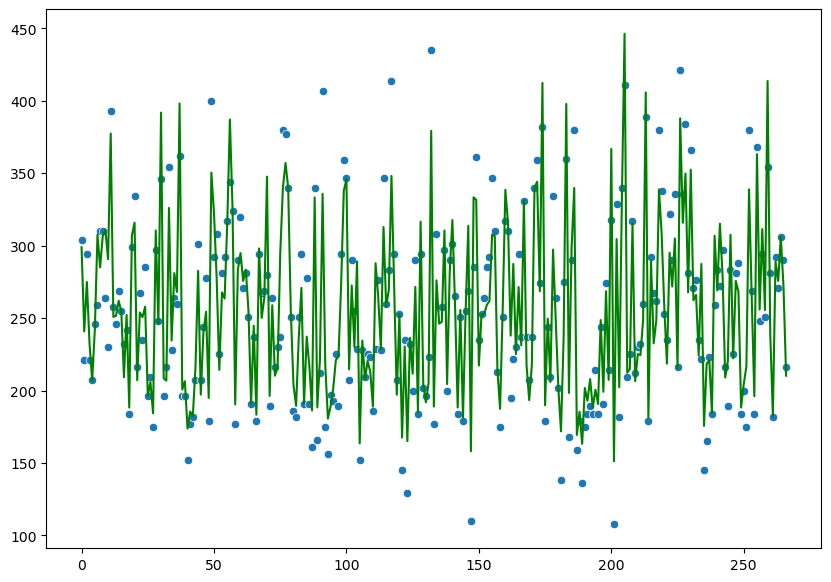

In [23]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=np.arange(len(y_test)), y=y_test)
plt.plot(np.arange(len(y_test)), y_pred, "g")

plt.show()

### 5. Evaluation

In [25]:
from sklearn.metrics import mean_absolute_error

MAE = mean_absolute_error(y_test, y_pred)

In [27]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, y_pred)

In [28]:
# Root Mean Squared Error (RMSE) 
RMSE = np.sqrt(MSE)

In [29]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)

In [33]:
pd.DataFrame({"Model": "Multiple Linear Regression",
              "MAE": MAE,
              "MSE": MSE,
              "RMSE": RMSE,
              "R2": r2},
            index = [0])

,Model,MAE,MSE,RMSE,R2
0,Multiple Linear Regression,17.297677,556.245895,23.584866,0.865899
